In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt

import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
kiosk_df = pd.read_csv('./data/station_history_cumulative_weather.csv')

In [3]:
kiosk_df.head()

,station_id,bikes,docks,Minute,Hour,Day,Month,Year,Day_of_Week,Temp,Wind_Speed,Precip
0,1,3,12,50,18,16,6,2018,5,80.88,7.59,0.0
1,2,9,6,50,18,16,6,2018,5,80.88,7.59,0.0
2,3,2,12,50,18,16,6,2018,5,80.88,7.59,0.0
3,4,14,5,50,18,16,6,2018,5,80.88,7.59,0.0
4,6,4,7,50,18,16,6,2018,5,80.88,7.59,0.0


In [4]:
def empty_full_or_neither(row):
    if row['bikes'] == 0:
        return 0
    elif row['docks'] == 0:
        return 1
    else:
        return 2


kiosk_df['empty_full_or_neither'] = kiosk_df.apply(empty_full_or_neither, axis = 1)

In [5]:
#Add datetime objects to data df
def dateTime(Year,Month,Day,Hours,Minutes,Seconds):
    return np.datetime64("{a:04d}-{b:02d}-{c:02d}T{d:02d}:{e:02d}:{f:02d}".format(a=int(Year),b=int(Month),c=int(Day),
                                                                                  d=int(Hours),e=int(Minutes),f=int(Seconds)))

kiosk_df['datetime'] = kiosk_df.apply(lambda row: dateTime(row['Year'],row['Month'],
                                                           row['Day'],row['Hour'],
                                                           row['Minute'],0), axis = 1)

In [6]:
kiosk_df = kiosk_df.set_index('datetime')

In [7]:
kiosk_df.tail()

,station_id,bikes,docks,Minute,Hour,Day,Month,Year,Day_of_Week,Temp,Wind_Speed,Precip,empty_full_or_neither
datetime,,,,,,,,,,,,,
2018-11-05 15:00:00,71,4,9,0,15,5,11,2018,0,53.1,0.37,0.0,2
2018-11-05 15:00:00,72,7,6,0,15,5,11,2018,0,53.1,0.37,0.0,2
2018-11-05 15:00:00,73,3,8,0,15,5,11,2018,0,53.1,0.37,0.0,2
2018-11-05 15:00:00,74,5,4,0,15,5,11,2018,0,53.1,0.37,0.0,2
2018-11-05 15:00:00,75,3,10,0,15,5,11,2018,0,53.1,0.37,0.0,2


# Single Kiosk Predictions

In [8]:
kiosk_df_1 = kiosk_df[kiosk_df['station_id'] == 47].copy()

kiosk_df_1.tail(10)

,station_id,bikes,docks,Minute,Hour,Day,Month,Year,Day_of_Week,Temp,Wind_Speed,Precip,empty_full_or_neither
datetime,,,,,,,,,,,,,
2018-11-05 01:45:00,47,6,7,45,1,5,11,2018,0,53.1,0.37,0.0,2
2018-11-05 01:50:00,47,6,7,50,1,5,11,2018,0,53.1,0.37,0.0,2
2018-11-05 01:55:00,47,7,6,55,1,5,11,2018,0,53.1,0.37,0.0,2
2018-11-05 02:00:00,47,7,6,0,2,5,11,2018,0,53.1,0.37,0.0,2
2018-11-05 02:05:00,47,7,6,5,2,5,11,2018,0,53.1,0.37,0.0,2
2018-11-05 14:40:00,47,12,1,40,14,5,11,2018,0,53.1,0.37,0.0,2
2018-11-05 14:45:00,47,8,5,45,14,5,11,2018,0,53.1,0.37,0.0,2
2018-11-05 14:50:00,47,6,7,50,14,5,11,2018,0,53.1,0.37,0.0,2
2018-11-05 14:55:00,47,6,7,55,14,5,11,2018,0,53.1,0.37,0.0,2


In [43]:
# Plot out the hourly bike rentals
def plot_vals(df, cols, title, times=None):
    ''' Plots a time series data'''
    
    fig, ax = plt.subplots(1,1, figsize=(20,6))

    if times is not None:
        ax = df[times[0]:times[1]].plot(y=cols, ax=ax) # , color='black', style=['--', '-'])
        title += ' ({} to {})'.format(times[0], times[1])
    else:
        ax = df.plot(y=cols, ax=ax) # , color='black', style=['--', '-'])

    ax.set_xlabel('Date', fontdict={'size' : 14})
    ax.set_ylabel('Rentals', fontdict={'size' : 14})
    ax.set_title(title, fontdict={'size' : 16}) 
    ttl = ax.title
    ttl.set_position([.5, 1.02])
#     ax.legend(['Hourly rentals'], fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

# Wow - that looks spiky ! Let's smooth this out
def smooth_ts(df, halflife):
    '''Smooths time series data using ewma and halflife
    INPUT: Dataframe to smooth, halflife for Exponential Weighted Moving Average
    RETURNS: Smoothed dataframe
    '''
    smooth_df = df.ewm(halflife=halflife, ignore_na=False,adjust=True,min_periods=0).mean()
    smooth_df = smooth_df.shift(periods=-halflife)
    smooth_df = smooth_df.fillna(0)
    return smooth_df

# plot_df['original'] = hourly_df['rentals']
# plot_rentals(hourly_smooth_df, ['rentals', 'Hourly aggregated rentals', ('2016-04-01', '2016-04-08'))


# todo ! Define the style in one place to keep graphs consistent

# plt.style.use('fivethirtyeight')
# # plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = 'Helvetica'
# plt.rcParams['font.monospace'] = 'Consolas'
# plt.rcParams['font.size'] = 10
# plt.rcParams['axes.labelsize'] = 10
# plt.rcParams['axes.labelweight'] = 'bold'
# plt.rcParams['xtick.labelsize'] = 8
# plt.rcParams['ytick.labelsize'] = 8
# plt.rcParams['legend.fontsize'] = 10
# plt.rcParams['figure.titlesize'] = 12

PLT_DPI = 150

def plot_ts(df, true, pred, title, ax):
    '''Generates one of the subplots to show time series'''
    plot_df = df.resample('1H').sum()
    ax = plot_df.plot(y=[pred, true], ax=ax) # , color='black', style=['--', '-'])
    ax.set_xlabel('', fontdict={'size' : 14})
    ax.set_ylabel('Count', fontdict={'size' : 14})
    ax.set_title(title + ' time series', fontdict={'size' : 16}) 
    ttl = ax.title
    ttl.set_position([.5, 1.02])
    ax.legend(['Predicted', 'Actual'], fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)   
    

def plot_scatter(true, pred, title, ax):
    '''Plots the results of a validation run on a scatter plot'''
    min_val = result_val_df.min().min() - 10.0
    max_val = result_val_df.max().max() + 20.0

    plt.scatter(x=true, y=pred)
    plt.axis('equal')
    plt.axis([min_val, max_val, min_val, max_val])
    plt.plot([min_val, max_val], [min_val, max_val], color='k', linestyle='-', linewidth=1)
    
    ax.set_xlabel('Actual rentals', fontdict={'size' : 14})
    ttl = ax.title
    ttl.set_position([.5, 1.02])
    ax.set_ylabel('Predicted rentals', fontdict={'size' : 14})
    ax.set_title(title, fontdict={'size' : 16}) 

    filename = title.lower().replace(' ', '_')

def plot_all_results(df, true, pred, title):
    ''''''
    fig, ax = plt.subplots(1,2,figsize=(20,10), gridspec_kw={'width_ratios':[2,1]}, )
    plot_ts(df, true, pred, title, ax=ax[0])
    plot_scatter(df[true], df[pred], title, ax[1])
    filename='./saves/'+title.lower().replace(' ', '-').replace(',','')
    plt.savefig(filename, type='png', dpi=PLT_DPI, bbox_inches='tight')
    print('Saved file to {}'.format(filename))



In [44]:
#view daily rentals for every kiosk
#outputs graph for each kiosk

#for i in kiosk_df['station_id'].unique():
#   temp_kiosk_df = kiosk_df[kiosk_df['station_id'] == i].copy()
#    plot_vals(temp_kiosk_df, ['bikes', 'docks'], 'Available Bikes and Docks, Dock' + str(i), ('2018-09-05', '2018-09-06'))

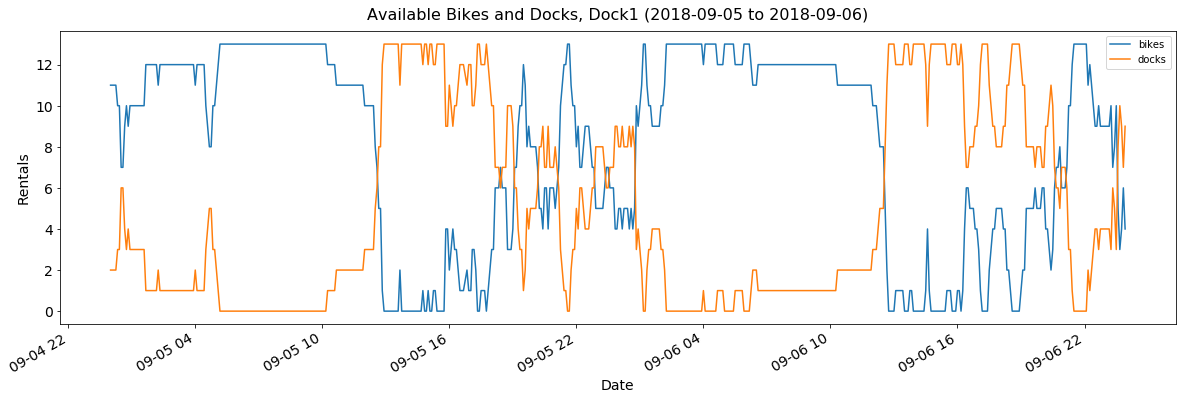

In [45]:
plot_vals(kiosk_df_1, ['bikes', 'docks'], 'Available Bikes and Docks, Dock1', ('2018-09-05', '2018-09-06'))

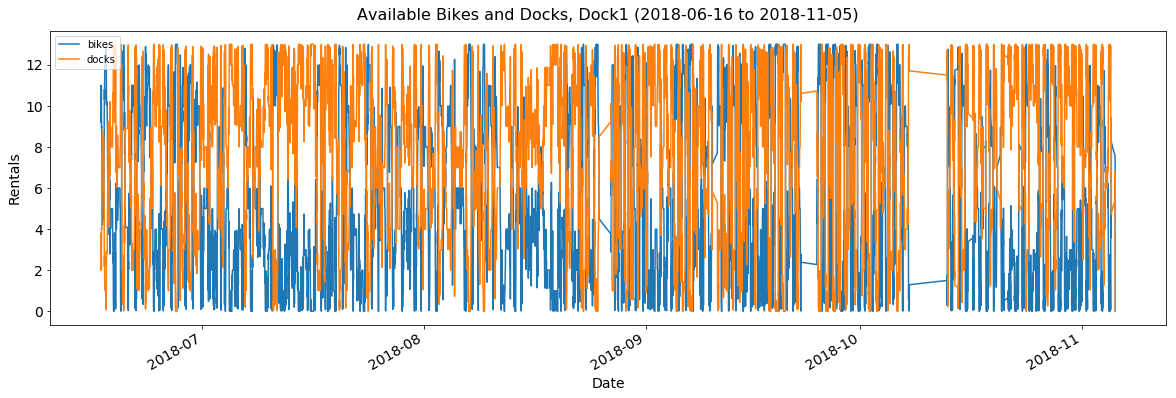

In [12]:
smooth_df = smooth_ts(kiosk_df_1, 2)

plot_vals(smooth_df, ['bikes', 'docks'], 'Available Bikes and Docks, Dock1', ('2018-06-16', '2018-11-05'))

In [13]:
from bcycle_lib.all_utils import add_time_features

TRAIN_START = '2018-06-16'
TRAIN_END = '2018-09-16'
VAL_START = '2018-09-17'
VAL_END = '2018-11-05'

kiosk_df_1 = add_time_features(kiosk_df_1)
drop_cols = ['station_id','docks','Minute', 'Hour', 'Day', 'Month', 
             'Year', 'Day_of_Week', 'Temp', 'Wind_Speed', 'Precip', 'empty_full_or_neither']

train_df_1 = kiosk_df_1[TRAIN_START:TRAIN_END].drop(drop_cols, axis=1).copy()
val_df_1 = kiosk_df_1[VAL_START:VAL_END].drop(drop_cols, axis=1).copy()

n_train = train_df_1.shape[0]
n_val = val_df_1.shape[0]
n_total = n_train + n_val
n_train_pct = (n_train / n_total) * 100.0
n_val_pct = (n_val / n_total) * 100.0

print('\nTraining data first and last row:\n{}\n{}'.format(train_df_1.index[0], train_df_1.index[-1]))
print('\nValidation data first and last row:\n{}\n{}\n'.format(val_df_1.index[0], val_df_1.index[-1]))

print('Train data shape: {}, {:.2f}% of rows'.format(train_df_1.shape, n_train_pct))
print('Validation data shape: {}, {:.2f}% of rows'.format(val_df_1.shape, n_val_pct))

train_df_1.head()


Training data first and last row:
2018-06-16 18:50:00
2018-09-16 23:55:00

Validation data first and last row:
2018-09-17 00:00:00
2018-11-05 15:00:00

Train data shape: (25551, 2), 69.53% of rows
Validation data shape: (11196, 2), 30.47% of rows


,bikes,day-hour
datetime,,
2018-06-16 18:50:00,11,5-18
2018-06-16 18:55:00,11,5-18
2018-06-16 19:00:00,11,5-19
2018-06-16 19:05:00,11,5-19
2018-06-16 19:10:00,11,5-19


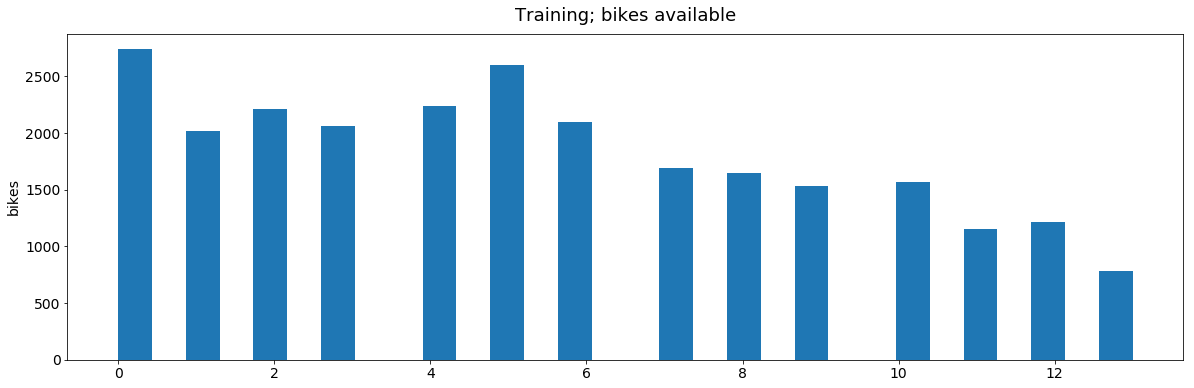

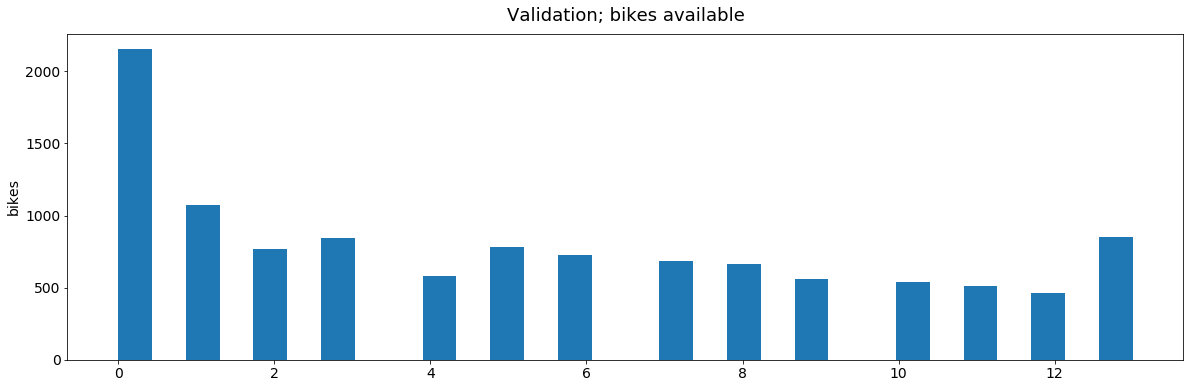

In [14]:
from bcycle_lib.all_utils import plot_hist
SIZE=(20,6)

plot_hist(train_df_1['bikes'], bins=30, size=SIZE, title='Training; bikes available', xlabel='', ylabel='bikes')
plot_hist(val_df_1['bikes'], bins=30, size=SIZE, title='Validation; bikes available', xlabel='', ylabel='bikes')

In [15]:
print('Training data shape: {}'.format(train_df_1.shape))
print('Validation data shape: {}'.format(val_df_1.shape))

train_df_1.head()

Training data shape: (25551, 2)
Validation data shape: (11196, 2)


,bikes,day-hour
datetime,,
2018-06-16 18:50:00,11,5-18
2018-06-16 18:55:00,11,5-18
2018-06-16 19:00:00,11,5-19
2018-06-16 19:05:00,11,5-19
2018-06-16 19:10:00,11,5-19


X_train shape: (25551, 168), y_train shape: (25551,)
X_val shape: (11196, 168), y_val shape: (11196,)
Hour-of-day baseline RMSE - Train: 3.15, Val: 3.64
Saved file to ./saves/hour-of-day-baseline


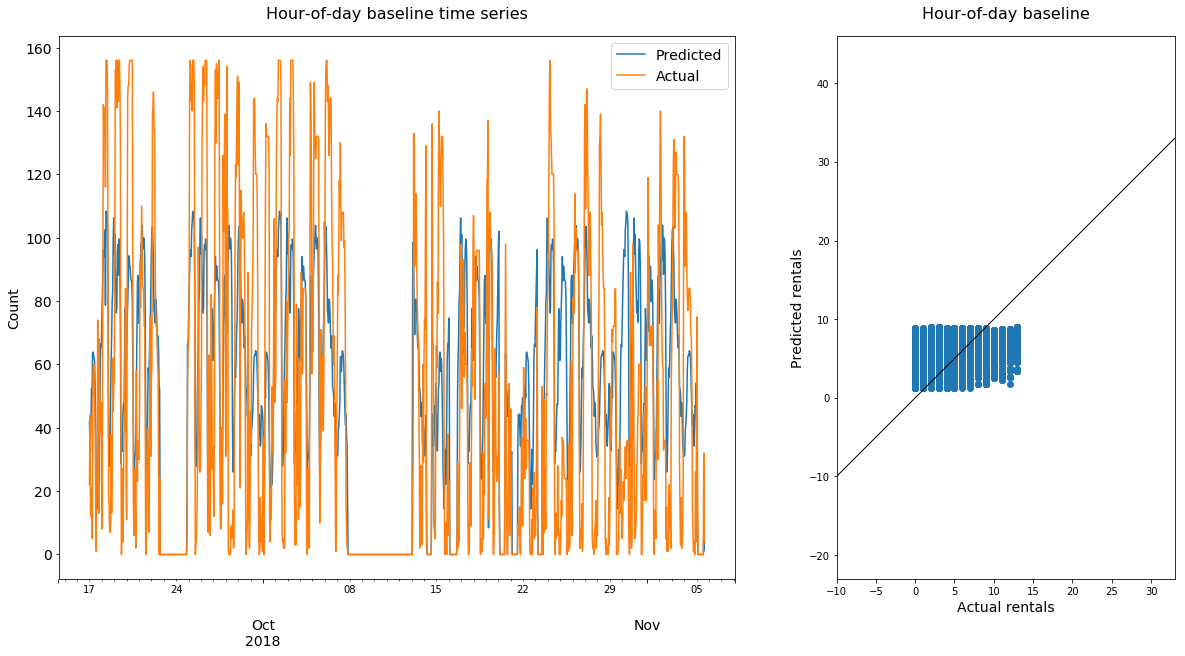

In [16]:
# Now we need to split into X and y
from bcycle_lib.all_utils import reg_x_y_split

X_train, y_train, _ = reg_x_y_split(train_df_1, target_col='bikes',ohe_cols=['day-hour'])
X_val, y_val, _ = reg_x_y_split(val_df_1,target_col='bikes',ohe_cols=['day-hour'])

print('X_train shape: {}, y_train shape: {}'.format(X_train.shape, y_train.shape))
print('X_val shape: {}, y_val shape: {}'.format(X_val.shape, y_val.shape))


from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from bcycle_lib.all_utils import df_from_results, plot_results, plot_val

reg = Ridge()
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_val_pred = reg.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

scores_df = pd.DataFrame({'train_rmse' : train_rmse, 'val_rmse' : val_rmse}, index=['linreg_time'])

result_train_df, result_val_df = df_from_results(train_df_1.index, y_train, y_train_pred,
                                                 val_df_1.index, y_val, y_val_pred)

print('Hour-of-day baseline RMSE - Train: {:.2f}, Val: {:.2f}'.format(train_rmse, val_rmse))

plot_all_results(result_val_df, 'true', 'pred', 'Hour-of-day baseline')

In [17]:
train_df_2_events = train_df_1.copy()
val_df_2_events = val_df_1.copy()

In [18]:
# Create a list of national holidays, with their observed dates days around them

holidays = {'hol_new_year' : ('2013-01-01', '2014-01-01','2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01'),
            
            'hol_mlk' : ('2013-01-21','2014-01-20','2015-01-19','2016-01-18','2017-01-16','2018-01-15'),
                              
            'hol_presidents' : ('2013-02-18','2014-02-17','2015-02-16','2016-02-15','2017-02-20','2018-02-19'),
                              
            'hol_memorial' : ('2013-05-27','2014-05-26','2015-05-25','2016-05-30','2017-05-29','2018-05-28'),
                              
            'hol_independence' : ('2013-07-04', '2014-07-04', '2015-07-04', '2016-07-04', '2017-07-04', '2018-07-04'),
                              
            'hol_labor' : ('2013-09-02', '2014-09-01', '2015-09-07', '2016-09-05', '2017-09-04', '2018-09-03'),
                              
            'hol_columbus' : ('2013-10-14','2014-10-13','2015-10-12','2016-10-10','2017-10-09','2018-10-08'),
                              
            'hol_veterans' : ('2013-11-11', '2014-11-11', '2015-11-11', '2016-11-11', '2017-11-11', '2018-11-11'),
                              
            'hol_thanksgiving' : ('2013-11-28','2014-11-27','2015-11-26','2016-11-24','2017-11-23','2018-11-22'),
                              
            'hol_christmas' : ('2013-12-25','2014-12-25','2015-12-25','2016-12-25','2017-12-25','2018-12-25',)
           }


# Now with Events

events = {'sxsw' : ('2013-03-08', '2014-03-07', '2015-03-13', '2016-03-11', '2017-03-10', '2018-03-12'),
          'acl_wk1' : ('2013-10-04', '2014-10-03', '2015-10-02', '2016-09-30', '2017-10-06', '2018-10-04'),
          'acl_wk2' : ('2013-10-11', '2014-10-10', '2015-10-09', '2016-10-07', '2017-10-13', '2018-10-11'),
          'trail_of_lights': ('2013-12-08','2014-12-07','2015-12-08','2016-12-10','2017-12-09','2018-12-10')
         }


def days_to_date(row, col, dates):
    days = np.array([])
    for date in dates[col]:
        time1 = row.name
        time2 = datetime.strptime(date, "%Y-%m-%d")
        elapsedTime = time2-time1
        days = np.append(days, divmod(elapsedTime.total_seconds(), 60*60*24)[0])
        
    day = days[np.argmin(np.abs(days))] + 1
    return day



for col in holidays:
    train_df_2_events[col] = train_df_2_events.apply(days_to_date, col=col, dates=holidays, axis=1)
    val_df_2_events[col] = val_df_2_events.apply(days_to_date, col=col, dates=holidays, axis=1)

for col in events:
    train_df_2_events[col] = train_df_2_events.apply(days_to_date, col=col, dates=events, axis=1)
    val_df_2_events[col] = val_df_2_events.apply(days_to_date, col=col, dates=events, axis=1)

In [19]:
# Check they were all added here 1
train_df_2_events.head()

# train_df[train_df['event_sxsw'] == 1]

,bikes,day-hour,hol_new_year,hol_mlk,hol_presidents,hol_memorial,hol_independence,hol_labor,hol_columbus,hol_veterans,hol_thanksgiving,hol_christmas,sxsw,acl_wk1,acl_wk2,trail_of_lights
datetime,,,,,,,,,,,,,,,,
2018-06-16 18:50:00,11,5-18,-166.0,-152.0,-117.0,-19.0,18.0,79.0,114.0,148.0,159.0,-173.0,-96.0,110.0,117.0,177.0
2018-06-16 18:55:00,11,5-18,-166.0,-152.0,-117.0,-19.0,18.0,79.0,114.0,148.0,159.0,-173.0,-96.0,110.0,117.0,177.0
2018-06-16 19:00:00,11,5-19,-166.0,-152.0,-117.0,-19.0,18.0,79.0,114.0,148.0,159.0,-173.0,-96.0,110.0,117.0,177.0
2018-06-16 19:05:00,11,5-19,-166.0,-152.0,-117.0,-19.0,18.0,79.0,114.0,148.0,159.0,-173.0,-96.0,110.0,117.0,177.0
2018-06-16 19:10:00,11,5-19,-166.0,-152.0,-117.0,-19.0,18.0,79.0,114.0,148.0,159.0,-173.0,-96.0,110.0,117.0,177.0


X_train shape: (25551, 182), y_train shape: (25551,)
X_val shape: (11196, 182), y_val shape: (11196,)
Hour-of-day and events RMSE - Train: 3.12, Val: 3.73
Saved file to ./saves/hour-of-day-with-events


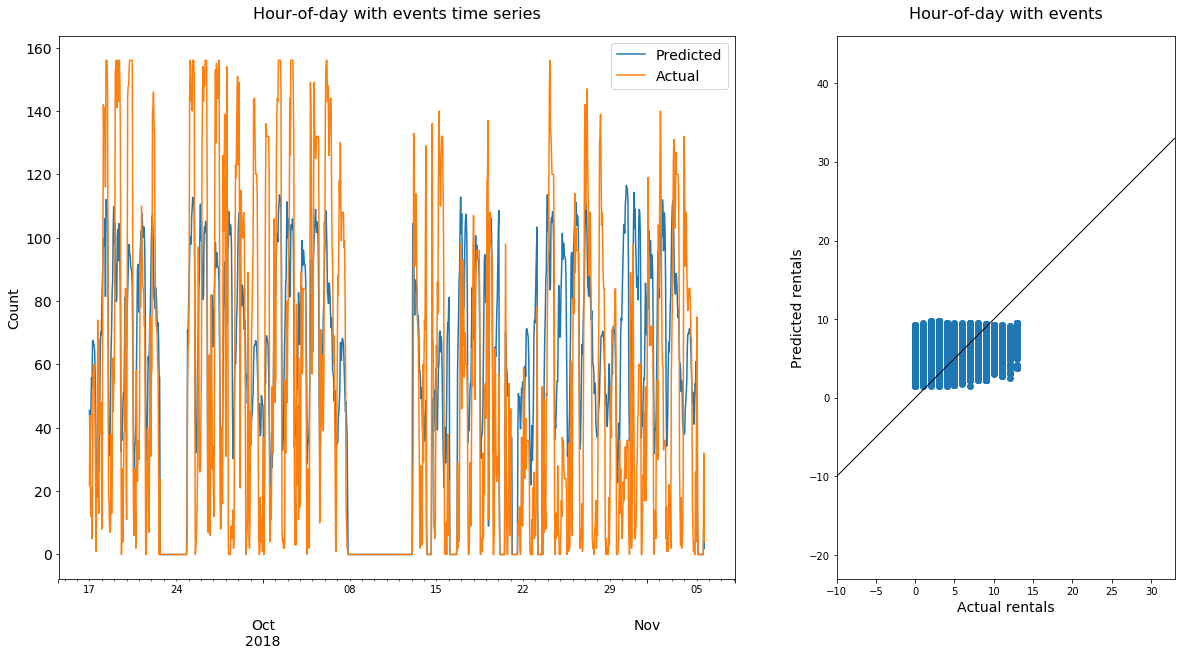

In [20]:
# Now we need to split into X and y
from bcycle_lib.all_utils import reg_x_y_split

X_train, y_train, _ = reg_x_y_split(train_df_2_events,target_col='bikes', ohe_cols=['day-hour'])
X_val, y_val, _ = reg_x_y_split(val_df_2_events,target_col='bikes',ohe_cols=['day-hour'])

print('X_train shape: {}, y_train shape: {}'.format(X_train.shape, y_train.shape))
print('X_val shape: {}, y_val shape: {}'.format(X_val.shape, y_val.shape))

from sklearn.linear_model import Ridge

reg = Ridge()
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_val_pred = reg.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Store the evaluation results
if 'linreg_time_events' not in scores_df.index:
    scores_df = scores_df.append(pd.DataFrame({'train_rmse' : train_rmse, 'val_rmse' : val_rmse}, 
                                              index=['linreg_time_events']))

print('Hour-of-day and events RMSE - Train: {:.2f}, Val: {:.2f}'.format(train_rmse, val_rmse))

result_train_df, result_val_df = df_from_results(train_df_2_events.index, y_train, y_train_pred,
                                                         val_df_2_events.index, y_val, y_val_pred)

plot_all_results(result_val_df, 'true', 'pred', 'Hour-of-day with events')

In [21]:
train_df_2ohe_events = train_df_2_events.copy()
val_df_2ohe_events = val_df_2_events.copy()

for col in list(holidays.keys()) + list(events.keys()):
    train_df_2ohe_events.loc[train_df_2ohe_events[col].abs() < 2, col] = 1
    train_df_2ohe_events.loc[train_df_2ohe_events[col].abs() > 2, col] = 0
    
    val_df_2ohe_events.loc[val_df_2ohe_events[col].abs() < 2, col] = 1
    val_df_2ohe_events.loc[val_df_2ohe_events[col].abs() > 2, col] = 0

X_train shape: (25551, 182), y_train shape: (25551,)
X_val shape: (11196, 182), y_val shape: (11196,)
Hour-of-day and events RMSE - Train: 3.12, Val: 3.64
Saved file to ./saves/hour-of-day-with-events


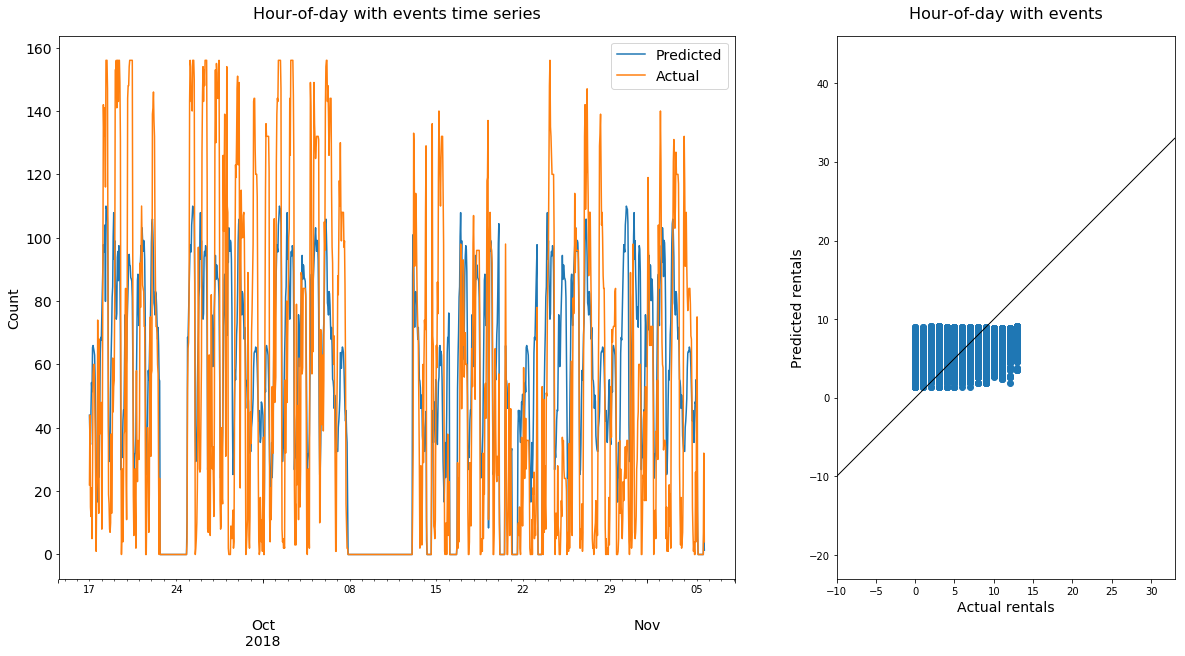

In [22]:
# Now we need to split into X and y
from bcycle_lib.all_utils import reg_x_y_split

X_train, y_train, _ = reg_x_y_split(train_df_2ohe_events,target_col='bikes', ohe_cols=['day-hour'])
X_val, y_val, _ = reg_x_y_split(val_df_2ohe_events,target_col='bikes',ohe_cols=['day-hour'])

print('X_train shape: {}, y_train shape: {}'.format(X_train.shape, y_train.shape))
print('X_val shape: {}, y_val shape: {}'.format(X_val.shape, y_val.shape))

from sklearn.linear_model import Ridge

reg = Ridge()
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_val_pred = reg.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Store the evaluation results
if 'linreg_time_events' not in scores_df.index:
    scores_df = scores_df.append(pd.DataFrame({'train_rmse' : train_rmse, 'val_rmse' : val_rmse}, 
                                              index=['linreg_time_events']))

print('Hour-of-day and events RMSE - Train: {:.2f}, Val: {:.2f}'.format(train_rmse, val_rmse))

result_train_df, result_val_df = df_from_results(train_df_2ohe_events.index, y_train, y_train_pred,
                                                         val_df_2ohe_events.index, y_val, y_val_pred)

plot_all_results(result_val_df, 'true', 'pred', 'Hour-of-day with events')

In [23]:
train_df_3_events_lags = train_df_2_events.copy()
val_df_3_events_lags = val_df_2_events.copy()

In [24]:
min_shift = 4

def add_lag_time_features(df, col):
    """Adds time-lagged features to improve prediction
    INPUT: df - Dataframe with date index
           col - column in dataframe used to calculate lags
    RETURNS: Dataframe with extra lag features
    """
    df[col + '_lag_4H'] = df[col].shift(4).fillna(method='backfill')
    df[col + '_lag_8H'] = df[col].shift(8).fillna(method='backfill')
    df[col + '_lag_1D'] = df[col].shift(24 * 1).fillna(method='backfill')
    df[col + '_lag_2D'] = df[col].shift(24 * 2).fillna(method='backfill')
    df[col + '_lag_3D'] = df[col].shift(24 * 3).fillna(method='backfill')
    df[col + '_lag_4D'] = df[col].shift(24 * 4).fillna(method='backfill')
    df[col + '_lag_5D'] = df[col].shift(24 * 5).fillna(method='backfill')
    df[col + '_lag_6D'] = df[col].shift(24 * 6).fillna(method='backfill')
    df[col + '_lag_1W'] = df[col].shift(24 * 7).fillna(method='backfill')
    return df

def add_win_time_features(df, col):
    """Adds rolling window features to improve prediction
    INPUT: df - Dataframe with date index
           col - column in dataframe used to calculate lags
    RETURNS: Dataframe with extra window features
    """
    df[col + '_win_1D'] = df[col].rolling(window=24*2, win_type='blackman').mean().fillna(method='backfill')
    df[col + '_win_1W'] = df[col].rolling(window=24*8, win_type='blackman').mean().fillna(method='backfill')
    return df

def add_median_time_features(df, col):
    """Adds median bike rental values to correct for longer term changes
    """
    df[col + '_med_4H'] = df[col].shift(min_shift + 1).resample('4H').median()
    df[col + '_med_4H'] = df[col + '_med_4H'].fillna(method='ffill').fillna(0)
    df[col + '_med_1D'] = df[col].shift(min_shift + 24*1).resample('1D').median()
    df[col + '_med_1D'] = df[col + '_med_1D'].fillna(method='ffill').fillna(0)
    df[col + '_med_1W'] = df[col].shift(min_shift + 24*7).resample('1W').median()
    df[col + '_med_1W'] = df[col + '_med_1W'].fillna(method='ffill').fillna(0)
    df[col + '_med_1M'] = df[col].shift(min_shift + 24*30).resample('1M').median()
    df[col + '_med_1M'] = df[col + '_med_1M'].fillna(method='ffill').fillna(0)

    return df


train_df_3_events_lags = add_lag_time_features(train_df_3_events_lags, 'bikes')
val_df_3_events_lags   = add_lag_time_features(val_df_3_events_lags  , 'bikes')

train_df_3_events_lags = add_win_time_features(train_df_3_events_lags, 'bikes')
val_df_3_events_lags   = add_win_time_features(val_df_3_events_lags  , 'bikes')

train_df_3_events_lags = add_median_time_features(train_df_3_events_lags, 'bikes')
val_df_3_events_lags   = add_median_time_features(val_df_3_events_lags  , 'bikes')

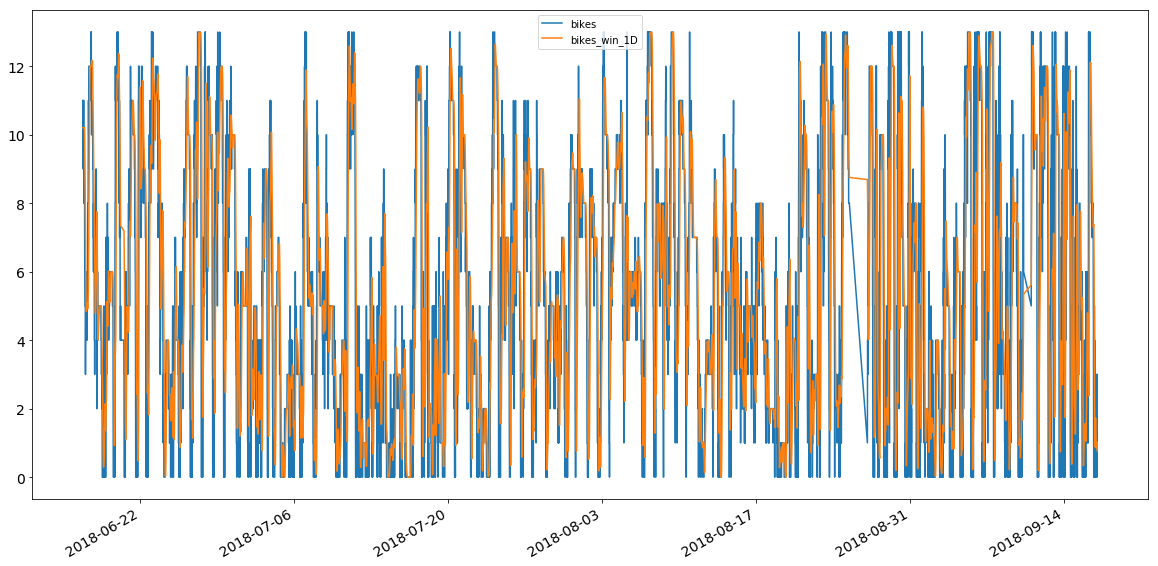

In [25]:
# # Lag features
from bcycle_lib.all_utils import plot_lines

plot_df = train_df_3_events_lags[TRAIN_START:TRAIN_END]
plot_lines(plot_df[['bikes', 'bikes_win_1D']], plt.subplots(1,1,figsize=(20,10)), title='', xlabel='', ylabel='')

X_train shape: (25551, 197), y_train shape: (25551,)
X_val shape: (11196, 197), y_val shape: (11196,)
Hour-of-day with events and lags RMSE - Train: 1.28, Val: 1.54
Saved file to ./saves/hour-of-day-with-events-and-lags


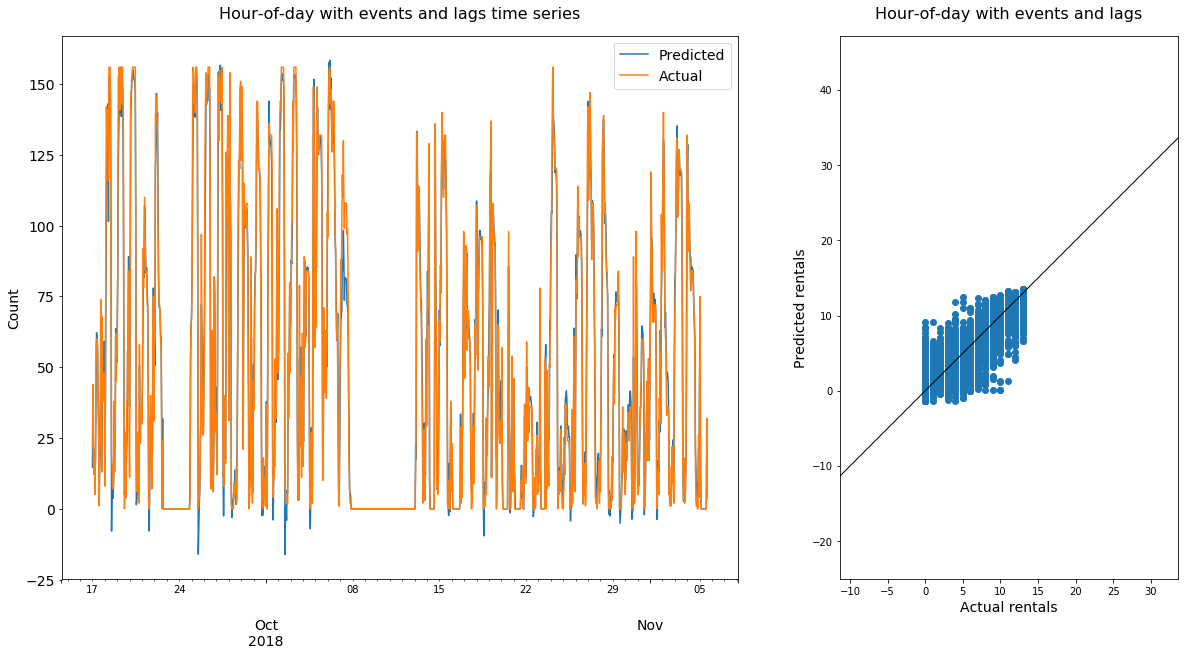

In [26]:
# Now we need to split into X and y
from bcycle_lib.all_utils import reg_x_y_split

drop_cols = ['station_id','docks','Minute', 'Hour', 'Day', 'Month', 
             'Year', 'Day_of_Week', 'Temp', 'Wind_Speed', 'Precip', 'empty_full_or_neither']

X_train, y_train, _ = reg_x_y_split(train_df_3_events_lags,target_col='bikes', ohe_cols=['day-hour'])
X_val, y_val, _ = reg_x_y_split(val_df_3_events_lags,target_col='bikes',ohe_cols=['day-hour'])

print('X_train shape: {}, y_train shape: {}'.format(X_train.shape, y_train.shape))
print('X_val shape: {}, y_val shape: {}'.format(X_val.shape, y_val.shape))

from sklearn.linear_model import Ridge

reg = Ridge()
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_val_pred = reg.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Store the evaluation results
if 'linreg_time_events_lags' not in scores_df.index:
    scores_df = scores_df.append(pd.DataFrame({'train_rmse' : train_rmse, 'val_rmse' : val_rmse}, 
                                              index=['linreg_time_events_lags']))

print('Hour-of-day with events and lags RMSE - Train: {:.2f}, Val: {:.2f}'.format(train_rmse, val_rmse))

result_train_df, result_val_df = df_from_results(train_df_3_events_lags.index, y_train, y_train_pred,
                                                 val_df_3_events_lags.index, y_val, y_val_pred)

plot_all_results(result_val_df, 'true', 'pred', 'Hour-of-day with events and lags')

In [27]:
train_df_4_events_lags_weather = train_df_3_events_lags.copy()
val_df_4_events_lags_weather = val_df_3_events_lags.copy()

for col in ['Temp', 'Wind_Speed', 'Precip']:
    train_df_4_events_lags_weather[col] = kiosk_df_1[TRAIN_START:TRAIN_END][col]
    val_df_4_events_lags_weather[col] = kiosk_df_1[VAL_START:VAL_END][col]

X_train shape: (25551, 200), y_train shape: (25551,)
X_val shape: (11196, 200), y_val shape: (11196,)
Hour-of-day, events, lags, and weather RMSE - Train: 1.28, Val: 1.54
Saved file to ./saves/hour-of-day-with-events-lags-and-weather


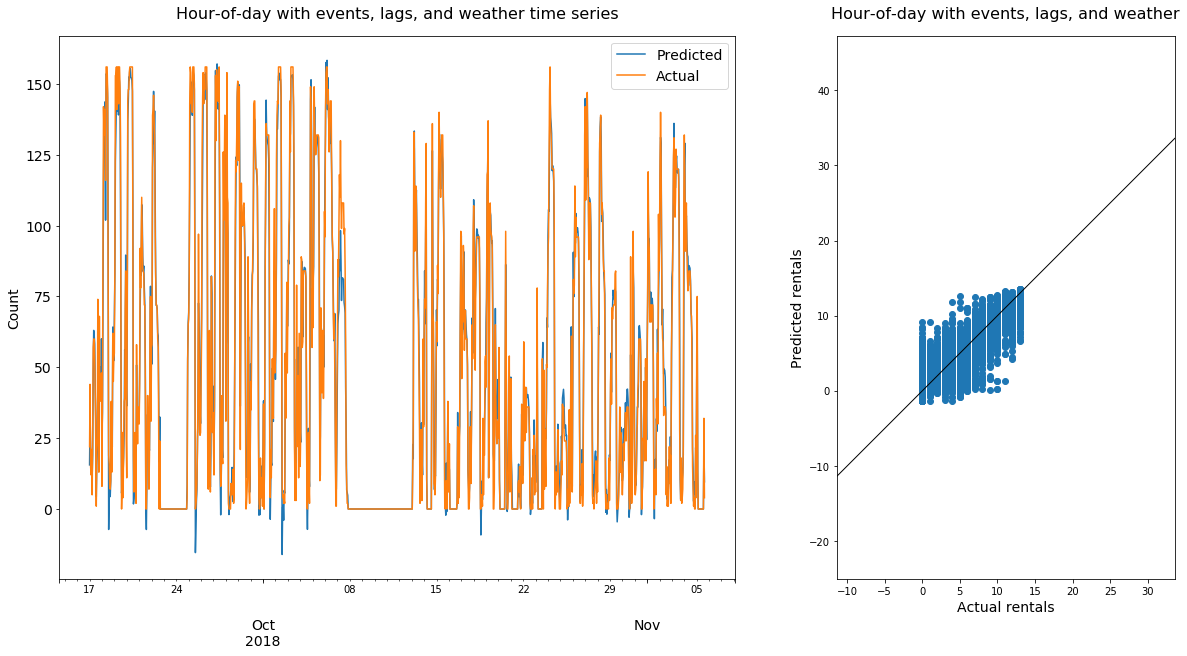

In [28]:
# Now we need to split into X and y
from bcycle_lib.all_utils import reg_x_y_split

X_train, y_train, _ = reg_x_y_split(train_df_4_events_lags_weather,target_col='bikes', ohe_cols=['day-hour'])
X_val, y_val, _ = reg_x_y_split(val_df_4_events_lags_weather,target_col='bikes',ohe_cols=['day-hour'])


print('X_train shape: {}, y_train shape: {}'.format(X_train.shape, y_train.shape))
print('X_val shape: {}, y_val shape: {}'.format(X_val.shape, y_val.shape))

from sklearn.linear_model import Ridge

reg = Ridge()
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_val_pred = reg.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Store the evaluation results
if 'linreg_time_events_lags_weather' not in scores_df.index:
    scores_df = scores_df.append(pd.DataFrame({'train_rmse' : train_rmse, 'val_rmse' : val_rmse}, 
                                              index=['linreg_time_events_lags_weather']))

print('Hour-of-day, events, lags, and weather RMSE - Train: {:.2f}, Val: {:.2f}'.format(train_rmse, val_rmse))

result_train_df, result_val_df = df_from_results(train_df_4_events_lags_weather.index, y_train, y_train_pred,
                                                         val_df_4_events_lags_weather.index, y_val, y_val_pred)

plot_all_results(result_val_df, 'true', 'pred', 'Hour-of-day with events, lags, and weather')

In [ ]:
from scipy.signal import welch
from scipy.fftpack import fft
import numpy as np
from bcycle_lib.detect_peaks import detect_peaks

N = 512
f_s = 50
t_n = 2.56
T = t_n / N
columns = ['Temp', 'bikes']
no_peaks = 5
denominator = 10

def get_psd_values(y_values, T, N, f_s):
    f_values, psd_values = welch(y_values, fs=f_s)
    return f_values, psd_values

def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]
 
def get_autocorr_values(y_values, T, N, f_s):
    autocorr_values = autocorr(y_values)
    x_values = np.array([T * jj for jj in range(0, N)])
    return x_values, autocorr_values


def get_first_n_peaks(x,y,no_peaks=5):
    x_, y_ = list(x), list(y)
    if len(x_) >= no_peaks:
        return x_[:no_peaks], y_[:no_peaks]
    else:
        missing_no_peaks = no_peaks-len(x_)
        return x_ + [0]*missing_no_peaks, y_ + [0]*missing_no_peaks
    
def get_features(x_values, y_values, mph):
    indices_peaks = detect_peaks(y_values, mph=mph)
    indices_peaks = sorted(i for i in indices_peaks if i <= N-1)
    peaks_x, peaks_y = get_first_n_peaks(x_values[indices_peaks], y_values[indices_peaks])
    return peaks_x + peaks_y

def create_col_labels(columns):
    labels = pd.DataFrame()
    for col in columns:
        temp = []
        axes=['psdx','psdy','fftx','ffty','autox','autoy']
        for ax in axes:
            for i in range(0,no_peaks):
                temp += [col + ' ' + ax + str(i%5)]
        kwargs = {col : pd.Series(temp)}
        labels = labels.assign(**kwargs)
    return labels

def extract_features_labels(dataset, T, N, f_s, denominator, columns):
    col_labels = create_col_labels(columns)
    percentile = 5
    list_of_features = pd.Series([])
    for col in columns:
        features = []
        signal = dataset[col]
        if len(signal) == 0:
            list_of_features = list_of_features.append(pd.Series([0]*(no_peaks*3*2), col_labels[col]))
        else:
            signal_min = np.nanpercentile(signal, percentile)
            signal_max = np.nanpercentile(signal, 100-percentile)
            #ijk = (100 - 2*percentile)/10
            mph = signal_min + (signal_max - signal_min)/denominator

            features += get_features(*get_psd_values(signal, T, N, f_s), mph)
            features += get_features(*get_fft_values(signal, T, N, f_s), mph)
            features += get_features(*get_autocorr_values(signal, T, N, f_s), mph)
            list_of_features = list_of_features.append(pd.Series(features, col_labels[col]))
    return (list_of_features)


def extract_features_from_row(df):
    col_labels = create_col_labels(columns)
    for col in col_labels.values.ravel('F'):
        df[col] = 0
    for i, row in df.iterrows():
        new_features = extract_features_labels(df[(row.name - dt.timedelta(days=31)):(row.name - dt.timedelta(days=1))], 
                                T, N, f_s, denominator, columns)

        for feature in new_features.index:
            df.at[i, feature] = new_features[feature]

            
combined_df = pd.concat([train_df_4_events_lags_weather, val_df_4_events_lags_weather])
extract_features_from_row(df=combined_df)


In [ ]:
def get_values(y_values, T, N, f_s):
    y_values = y_values
    x_values = [T * kk for kk in range(0,len(y_values))]
    return x_values, y_values
 
####
DATE_START = '2018-03-01'


colors = ['b']
suptitle = "Different signals for the activity: {}"
 
xlabels = ['Time [hr]', 'Freq [Hz]', 'Freq [Hz]', 'Time lag [hr]']
ylabel = 'Amplitude'
axtitles = [['Checkouts', 'Temp'],
            ['FFT temp', 'FFT Checkouts'],
            ['PSD temp', 'PSD Checkouts'],
            ['Autocorr temp', 'Autocorr Checkouts']
           ]
 
list_functions = [get_values, get_fft_values, get_psd_values, get_autocorr_values]

signal_no = 0
signals = [combined_df[DATE_START:].iloc[:N]['bikes'].values, 
           combined_df[DATE_START:].iloc[:N]['Temp'].values]

label = columns[signal_no]
 
f, axarr = plt.subplots(nrows=4, ncols=2, figsize=(12,12))
 
for row_no in range(0,4):
    for comp_no in range(0,2):
        col_no = comp_no // 1
        plot_no = comp_no % 1
        color = colors[plot_no]
 
        axtitle  = axtitles[row_no][col_no]
        xlabel = xlabels[row_no]
        value_retriever = list_functions[row_no]
 
        ax = axarr[row_no, col_no]
        ax.set_title(axtitle, fontsize=16)
        ax.set_xlabel(xlabel, fontsize=16)
        if col_no == 0:
            ax.set_ylabel(ylabel, fontsize=16)
 
        signal_component = signals[comp_no]
        x_values, y_values = value_retriever(signal_component, T, N, f_s)
        ax.plot(x_values, y_values, linestyle='-', color=color)
        if row_no > 0:
            max_peak_height = 0.1 * np.nanmax(y_values)
            indices_peaks = detect_peaks(y_values, mph=max_peak_height)
            ax.scatter(x_values[indices_peaks], y_values[indices_peaks], c='r', marker='*', s=60)
        if col_no == 2:
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            
plt.tight_layout()
plt.subplots_adjust(top=0.90, hspace=0.6)
plt.savefig('./saves/transforms.png', dpi=PLT_DPI, bbox_inches='tight')
plt.show()

In [ ]:
#recreate the training and validation sets

train_df_5_events_lags_weather_transform = combined_df[TRAIN_START:TRAIN_END].copy()
val_df_5_events_lags_weather_transform = combined_df[VAL_START:VAL_END].copy()

In [ ]:
# Now we need to split into X and y
from bcycle_lib.all_utils import reg_x_y_split

X_train, y_train, _ = reg_x_y_split(train_df_5_events_lags_weather_transform,target_col='bikes', ohe_cols=['day-hour'])
X_val, y_val, _ = reg_x_y_split(val_df_5_events_lags_weather_transform,target_col='bikes',ohe_cols=['day-hour'])

print('X_train shape: {}, y_train shape: {}'.format(X_train.shape, y_train.shape))
print('X_val shape: {}, y_val shape: {}'.format(X_val.shape, y_val.shape))

from sklearn.linear_model import Ridge

reg = Ridge()
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_val_pred = reg.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Store the evaluation results
if 'linreg_time_events_lags_weather_transforms' not in scores_df.index:
    scores_df = scores_df.append(pd.DataFrame({'train_rmse' : train_rmse, 'val_rmse' : val_rmse}, 
                                              index=['linreg_time_events_lags_weather_transforms']))

print('Hour-of-day, events, lags, weather, and transforms RMSE - Train: {:.2f}, Val: {:.2f}'.format(train_rmse, val_rmse))

result_train_df, result_val_df = df_from_results(train_df_5_events_lags_weather_transform.index, y_train, y_train_pred,
                                                         val_df_5_events_lags_weather_transform.index, y_val, y_val_pred)

plot_all_results(result_val_df, 'true', 'pred', 'Hour-of-day with events, lags, weather, and transforms')

,train_rmse,val_rmse
linreg_time,3.15,3.64
linreg_time_events,3.12,3.73
linreg_time_events_lags,1.28,1.54
linreg_time_events_lags_weather,1.28,1.54


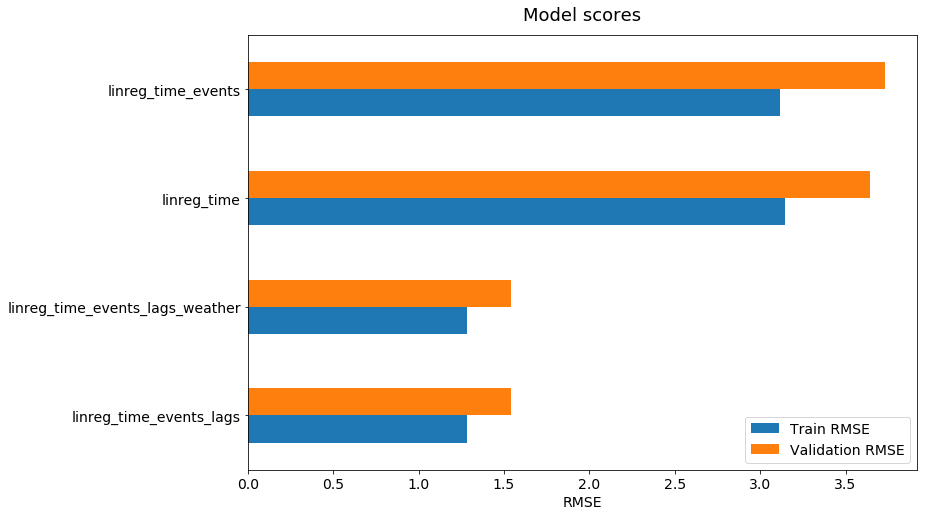

In [29]:
from bcycle_lib.all_utils import plot_scores
plot_scores(scores_df, 'Model scores', 'val_rmse')
plt.savefig('linear_scores.png', dpi=PLT_DPI, bbox_inches='tight')

scores_df.round(2)

# Model Predictions

In [30]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, \
                                 LassoLars, BayesianRidge, HuberRegressor

from sklearn.model_selection import KFold, cross_val_score, train_test_split, \
                                    LeaveOneOut, RandomizedSearchCV, \
                                    learning_curve, GridSearchCV, ParameterGrid

from sklearn.metrics import mean_squared_error, make_scorer

from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, AdaBoostRegressor

from sklearn.model_selection import TimeSeriesSplit

verbose = False
rs = 1738
tscv = TimeSeriesSplit(n_splits=4)

train_finalized_df = train_df_4_events_lags_weather
val_finalized_df = val_df_4_events_lags_weather

C:\Users\Jared\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [31]:
from sklearn.preprocessing import StandardScaler

def model_eval(model, train_df, val_df, X_train, y_train, X_val, y_val, verbose=False):
    '''Evaluates model using training and validation sets'''
    
    if verbose:
        print('X_train shape: {}, y_train shape: {}'.format(X_train.shape, y_train.shape))
        print('X_val shape: {}, y_val shape: {}'.format(X_val.shape, y_val.shape))

#     scaler = StandardScaler()
#     X_train = scaler.fit_transform(X_train)
#     X_val = scaler.transform(X_val)
    
    reg = model
    reg.fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

    y_val_pred = reg.predict(X_val)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

    result_train_df, result_val_df = df_from_results(train_df.index, y_train, y_train_pred,
                                                             val_df.index, y_val, y_val_pred)

    out = {'train_rmse' : train_rmse, 
           'val_rmse' : val_rmse,
           'result_train' : result_train_df,
           'result_val' : result_val_df}
    
    print('RMSE - Train: {:.2f}, Val: {:.2f}'.format(train_rmse, val_rmse))

    return out

RMSE - Train: 0.72, Val: 0.81
RMSE - Train: 0.72, Val: 0.80
RMSE - Train: 0.82, Val: 0.90
RMSE - Train: 0.78, Val: 0.85
RMSE - Train: 0.72, Val: 0.80
RMSE - Train: 0.81, Val: 0.89
RMSE - Train: 3.14, Val: 3.50
RMSE - Train: 0.18, Val: 1.12
RMSE - Train: 0.67, Val: 0.84


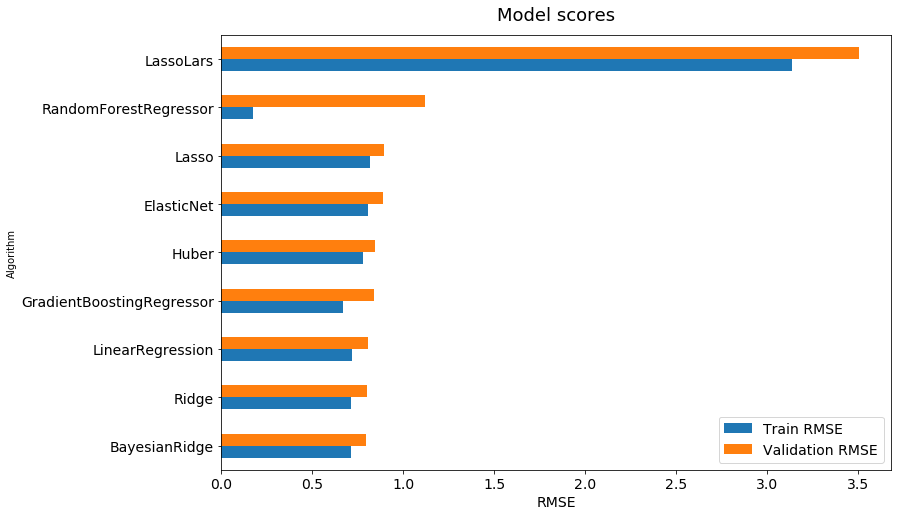

In [33]:
#testing baseline classifiers

X_train, y_train, _ = reg_x_y_split(train_finalized_df, 
                                    target_col='bikes',  ohe_cols=['day-hour'], verbose=verbose)
X_val, y_val, _ = reg_x_y_split(val_finalized_df, 
                                target_col='bikes',  ohe_cols=['day-hour'], verbose=verbose)

classifiers = []
classifiers.append(LinearRegression())
classifiers.append(Ridge(random_state=rs))
classifiers.append(Lasso(random_state=rs))
classifiers.append(HuberRegressor())
classifiers.append(BayesianRidge())
classifiers.append(ElasticNet(random_state=rs))
classifiers.append(LassoLars())
#classifiers.append(MLPRegressor(random_state=rs))
classifiers.append(RandomForestRegressor(random_state=rs))
classifiers.append(GradientBoostingRegressor(random_state=rs))

cv_results = np.array([])
for classifier in classifiers :
    cv_results = np.append(cv_results, model_eval(classifier, train_finalized_df, 
                                                  val_finalized_df, 
                                                  X_train, y_train, X_val, y_val, verbose=verbose))

train_rmse = np.array([])
val_rmse = np.array([])
for cv_result in cv_results:
    train_rmse = np.append(train_rmse, cv_result['train_rmse'])
    val_rmse = np.append(val_rmse, cv_result['val_rmse'])

cv_res = pd.DataFrame({"Train RMSE":train_rmse,\
                       "Val RMSE":val_rmse,\
                       "Algorithm":['LinearRegression', 'Ridge', 'Lasso', \
                                    'Huber', 'BayesianRidge', 'ElasticNet',\
                                    'LassoLars',#'MLPRegressor',\
                                    'RandomForestRegressor', \
                                    'GradientBoostingRegressor'
                                   ]})

plot_scores(cv_res.set_index('Algorithm'), 'Model scores', 'Val RMSE')
plt.savefig('multimodel_scores.png', dpi=PLT_DPI, bbox_inches='tight')

# Tuning

In [33]:
total_finalized_df = pd.concat([train_finalized_df, val_finalized_df])

In [38]:
#hyper parameter tuning: Gradient Boosting Regressor
total_finalized_df = pd.concat([train_finalized_df, val_finalized_df])

X_train, y_train, _ = reg_x_y_split(total_finalized_df, 
                                    target_col='bikes',  ohe_cols=['day-hour'], verbose=verbose)

GBR = GradientBoostingRegressor(random_state=rs)
gbr_param_grid = {"learning_rate" : [.05, .1],
                  'n_estimators' : [50, 100, 150],
                  'max_depth': [2,3,6]                                
                 }

gsGBR = GridSearchCV(GBR,param_grid = gbr_param_grid, cv=tscv, 
                          scoring='neg_mean_squared_error', n_jobs= -1, verbose = 1)

gsGBR.fit(X_train,y_train)

GBR_best = gsGBR.best_estimator_

# Best score
print(gsGBR.best_score_)
print(GBR_best)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 11.6min finished


-0.5498194350980938
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=1738,
             subsample=1.0, verbose=0, warm_start=False)


In [36]:
#hyper parameter tuning: Random Forests
total_finalized_df = pd.concat([train_finalized_df, 
                                                val_finalized_df])

X_train, y_train, _ = reg_x_y_split(total_finalized_df, 
                                    target_col='bikes',  ohe_cols=['day-hour'], verbose=verbose)

RF = RandomForestRegressor(random_state=rs)
rf_param_grid = { 'n_estimators' : [2, 4, 8, 10, 15],
                  'max_features' : [None, 2, 4],
                  'max_depth' : [2, 4, None]
              }

gsRF = GridSearchCV(RF,param_grid = rf_param_grid, cv=tscv, 
                         scoring='neg_mean_squared_error', n_jobs= -1, verbose = 1)

gsRF.fit(X_train,y_train)

RF_best = gsRF.best_estimator_

# Best score
print(gsRF.best_score_)
print(RF_best)

Fitting 4 folds for each of 45 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   37.0s finished


-0.62367894351882
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=1738, verbose=0, warm_start=False)


In [ ]:
#hyper parameter tuning: MLP
total_finalized_df = pd.concat([train_finalized_df, 
                                                val_finalized_df])

X_train, y_train, _ = reg_x_y_split(total_finalized_df[total_finalized_df.columns[0:-10]], 
                                    target_col='bikes',  ohe_cols=['day-hour'], verbose=verbose)

MLP = MLPRegressor(random_state=rs)
mlp_param_grid = {"activation": ['logistic','tanh','relu'],
                 "solver": ['sgd', 'adam'],
                  'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                 "alpha" : [.0001, .001, .005],
                 "learning_rate_init" : [.001, .005]
                 
              }

gsMLP = GridSearchCV(MLP,param_grid = mlp_param_grid, cv=tscv, 
                          scoring="neg_mean_squared_error", n_jobs=-1, verbose = 1)

gsMLP.fit(X_train,y_train)

MLP_best = gsMLP.best_estimator_

# Best score
print(gsMLP.best_score_)
print(MLP_best)

In [37]:
#hyper parameter tuning: EN
total_finalized_df = pd.concat([train_finalized_df, 
                                                val_finalized_df])

X_train, y_train, _ = reg_x_y_split(total_finalized_df, 
                                    target_col='bikes',  ohe_cols=['day-hour'], verbose=verbose)

EN = ElasticNet(random_state=rs)
en_param_grid = {'alpha' : [0.1, 5, 10],
                  'l1_ratio' : [0, .3, .5, .7, 1],
                  'normalize' : [False, True],
                 'tol' : [0.0001] 
              }

gsEN = GridSearchCV(EN,param_grid = en_param_grid, cv=tscv, 
                          scoring="neg_mean_squared_error", n_jobs=-1, verbose = 1)

gsEN.fit(X_train,y_train)

EN_best = gsEN.best_estimator_

# Best score
print(gsEN.best_score_)
print(EN_best)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.4min finished


-0.5355852246631232
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.3,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=1738, selection='cyclic', tol=0.0001, warm_start=False)


# Stacking

In [39]:
#Stacking: 
total_finalized_df = pd.concat([train_finalized_df, 
                                                val_finalized_df])

X, y, _ = reg_x_y_split(total_finalized_df, 
                                    target_col='bikes',  ohe_cols=['day-hour'], verbose=verbose)

GBR = GradientBoostingRegressor(random_state=rs)
gbr_param_grid = {"learning_rate" : [.05, .1],
                  'n_estimators' : [50, 100, 150],
                  'max_depth': [2,3,6]                                
                 }

best_score = 0

for g in ParameterGrid(gbr_param_grid):
    GBR.set_params(**g)
    
    train_score = 0
    test_score = 0
    
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        X_stacked_train = pd.DataFrame(columns=['GBR','RF','EN'])
        X_stacked_test = pd.DataFrame(columns=['GBR','RF','EN'])

        GBR_best.fit(X_train, y_train)
        RF_best.fit(X_train, y_train)
        EN_best.fit(X_train, y_train)

        X_stacked_train['GBR'] = GBR_best.predict(X_train)
        X_stacked_train['RF'] = RF_best.predict(X_train)
        X_stacked_train['EN'] = EN_best.predict(X_train)
        
        X_stacked_test['GBR'] = GBR_best.predict(X_test)
        X_stacked_test['RF'] = RF_best.predict(X_test)
        X_stacked_test['EN'] = EN_best.predict(X_test)
        
        GBR.fit(X_stacked_train, y_train)
        
        train_score += np.sqrt(mean_squared_error(y_train, GBR.predict(X_stacked_train)))
        test_score += np.sqrt(mean_squared_error(y_test, GBR.predict(X_stacked_test)))
    
    train_score /= tscv.get_n_splits()
    test_score /= tscv.get_n_splits()
    
    if test_score > best_score:
        best_score = test_score
        best_grid = g

gbr_stacked_best = GBR.set_params(**best_grid)
print(best_score)   
print(gbr_stacked_best)

0.876532026904521
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, presort='auto', random_state=1738,
             subsample=1.0, verbose=0, warm_start=False)


In [70]:
X_train, y_train, _ = reg_x_y_split(train_finalized_df, 
                                    target_col='bikes',  ohe_cols=['day-hour'], verbose=verbose)
X_val, y_val, _ = reg_x_y_split(val_finalized_df, 
                                target_col='bikes',  ohe_cols=['day-hour'], verbose=verbose)

X_stacked_train = pd.DataFrame(columns=['GBR','RF','EN'])
X_stacked_test = pd.DataFrame(columns=['GBR','RF','EN'])

GBR_best.fit(X_train, y_train)
RF_best.fit(X_train, y_train)
EN_best.fit(X_train, y_train)

X_stacked_train['GBR'] = GBR_best.predict(X_train)
X_stacked_train['RF'] = RF_best.predict(X_train)
X_stacked_train['EN'] = EN_best.predict(X_train)

X_stacked_test['GBR'] = GBR_best.predict(X_val)
X_stacked_test['RF'] = RF_best.predict(X_val)
X_stacked_test['EN'] = EN_best.predict(X_val)

results_1 = model_eval(gbr_stacked_best, X_stacked_train, X_stacked_test, 
                        X_stacked_train, y_train, X_stacked_test, y_val, verbose=verbose)

RMSE - Train: 0.52, Val: 0.98


Saved file to ./saves/stacked-models:-hour-of-day-with-events-lags-and-weather


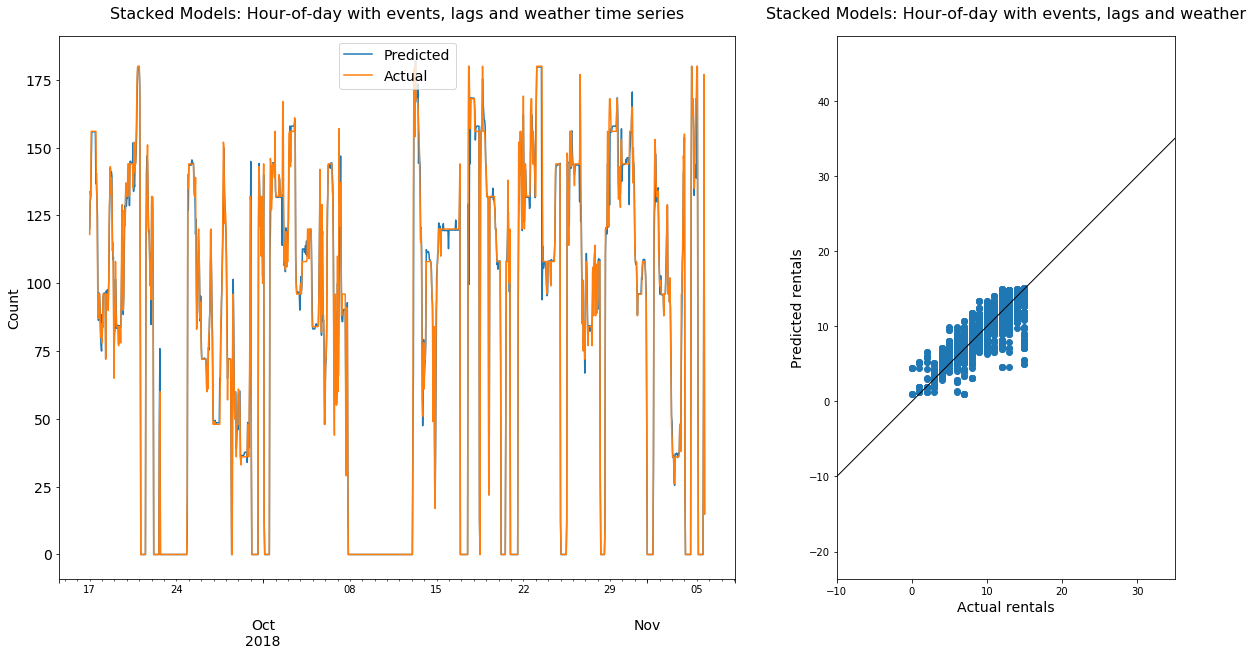

In [72]:
result_train_df, result_val_df = df_from_results(train_finalized_df.index, y_train, results_1['result_train']['pred'].values,
                                                         val_finalized_df.index, y_val, results_1['result_val']['pred'].values)

plot_all_results(result_val_df, 'true', 'pred', 'Stacked Models: Hour-of-day with events, lags and weather')

In [75]:
total_finalized_df['2018-10-08':]

,bikes,day-hour,hol_new_year,hol_mlk,hol_presidents,hol_memorial,hol_independence,hol_labor,hol_columbus,hol_veterans,...,bikes_lag_1W,bikes_win_1D,bikes_win_1W,bikes_med_4H,bikes_med_1D,bikes_med_1W,bikes_med_1M,Temp,Wind_Speed,Precip
datetime,,,,,,,,,,,,,,,,,,,,,
2018-10-13 02:10:00,3,5-2,-285.0,-271.0,-236.0,-138.0,-101.0,-40.0,-5.0,29.0,...,11.0,6.742501,7.697892,5.0,9.0,6.0,9.0,74.91,4.11,0.0
2018-10-13 02:15:00,3,5-2,-285.0,-271.0,-236.0,-138.0,-101.0,-40.0,-5.0,29.0,...,11.0,6.952127,7.672149,5.0,9.0,6.0,9.0,74.91,4.11,0.0
2018-10-13 02:20:00,3,5-2,-285.0,-271.0,-236.0,-138.0,-101.0,-40.0,-5.0,29.0,...,11.0,7.131660,7.646094,5.0,9.0,6.0,9.0,74.91,4.11,0.0
2018-10-13 02:25:00,3,5-2,-285.0,-271.0,-236.0,-138.0,-101.0,-40.0,-5.0,29.0,...,11.0,7.277994,7.619712,5.0,9.0,6.0,9.0,74.91,4.11,0.0
2018-10-13 02:30:00,3,5-2,-285.0,-271.0,-236.0,-138.0,-101.0,-40.0,-5.0,29.0,...,11.0,7.388852,7.592990,5.0,9.0,6.0,9.0,74.91,4.11,0.0
2018-10-13 02:35:00,3,5-2,-285.0,-271.0,-236.0,-138.0,-101.0,-40.0,-5.0,29.0,...,9.0,7.462776,7.565916,5.0,9.0,6.0,9.0,74.91,4.11,0.0
2018-10-13 02:40:00,3,5-2,-285.0,-271.0,-236.0,-138.0,-101.0,-40.0,-5.0,29.0,...,9.0,7.499085,7.538482,5.0,9.0,6.0,9.0,74.91,4.11,0.0
2018-10-13 02:45:00,3,5-2,-285.0,-271.0,-236.0,-138.0,-101.0,-40.0,-5.0,29.0,...,9.0,7.497824,7.510680,5.0,9.0,6.0,9.0,74.91,4.11,0.0
2018-10-13 02:50:00,5,5-2,-285.0,-271.0,-236.0,-138.0,-101.0,-40.0,-5.0,29.0,...,9.0,7.459676,7.482504,5.0,9.0,6.0,9.0,74.91,4.11,0.0


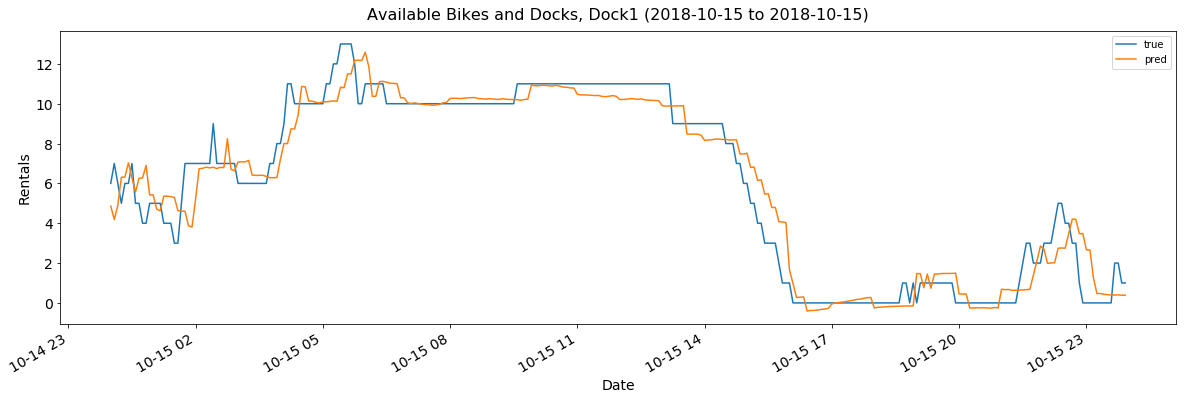

In [42]:
plot_vals(result_val_df, ['true', 'pred'], 'Available Bikes and Docks, Dock1', ('2018-10-15', '2018-10-15'))

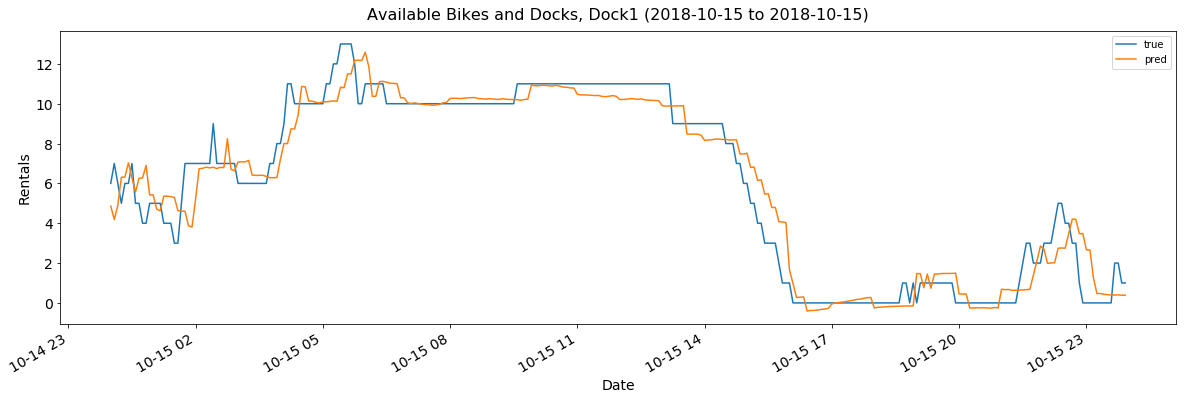

In [33]:
plot_vals(result_val_df, ['true', 'pred'], 'Available Bikes and Docks, Dock1', ('2018-10-15', '2018-10-15'))

In [34]:
kiosk_df_1.iloc[0]['bikes'] + kiosk_df_1.iloc[0]['docks']

13

In [39]:
kiosk_df_1.shape

(36747, 14)

In [40]:
kiosk_df_1[kiosk_df_1['empty_full_or_neither'] != 2].shape

(6527, 14)

In [36]:
result_val_df

,true,pred
datetime,,
2018-09-17 00:00:00,0,0.462185
2018-09-17 00:05:00,0,0.463504
2018-09-17 00:10:00,1,0.463504
2018-09-17 00:15:00,2,0.463504
2018-09-17 00:20:00,2,0.463504
2018-09-17 00:25:00,3,0.463504
2018-09-17 00:30:00,3,1.177621
2018-09-17 00:35:00,3,1.891738
2018-09-17 00:40:00,0,1.891738


In [35]:
result_val_df[result_val_df['true'] == 0]

,true,pred
datetime,,
2018-09-17 00:00:00,0,0.462185
2018-09-17 00:05:00,0,0.463504
2018-09-17 00:40:00,0,1.891738
2018-09-17 02:15:00,0,2.552308
2018-09-17 02:30:00,0,2.530329
2018-09-17 02:35:00,0,0.387977
2018-09-17 02:40:00,0,1.162601
2018-09-17 03:30:00,0,1.523827
2018-09-17 03:35:00,0,1.503658


In [80]:
result_val_df[result_val_df['true'] == kiosk_df_1.iloc[0]['bikes'] + kiosk_df_1.iloc[0]['docks']]

,true,pred
datetime,,
2018-09-20 14:00:00,15,11.756954
2018-09-20 14:05:00,15,11.756954
2018-09-20 14:10:00,15,11.756954
2018-09-20 14:15:00,15,11.756954
2018-09-20 14:20:00,15,11.506989
2018-09-20 20:15:00,15,14.014390
2018-09-20 20:20:00,15,14.014390
2018-09-20 20:25:00,15,14.014390
2018-09-20 20:30:00,15,14.014390
